# **Sentiment Analysis of AMD Stock of past 30 days**

*   To get our Stock Data we are using Yahoo Finance and for Sentiment we are using Vader Sentiment.
*   For our News we would be using newsapi to extract all our articles for past month.

This is a quick way to show we can get sentiment without using ML libraries but further we would also compute using Regression Analysis to check whether Sentiment does influence the Stock Prize.



In [4]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [5]:
#Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

In [ ]:
# Specify the start and end dates
start_date = "2025-02-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("AMD")
stock_data = nvidia_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,107.610001,112.089996,106.500000,112.010002,110385200,0.0,0.0
1,2025-02-06 00:00:00-05:00,110.930000,112.559998,109.019997,110.160004,50426600,0.0,0.0
2,2025-02-07 00:00:00-05:00,109.129997,109.919998,106.790001,107.559998,46082500,0.0,0.0
3,2025-02-10 00:00:00-05:00,108.440002,111.400002,108.150002,110.480003,34905400,0.0,0.0
4,2025-02-11 00:00:00-05:00,108.980003,113.070000,108.940002,111.099998,35033800,0.0,0.0


In [ ]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,107.610001,112.089996,106.500000,112.010002,110385200,0.0,0.0
1,2025-02-06 00:00:00-05:00,110.930000,112.559998,109.019997,110.160004,50426600,0.0,0.0
2,2025-02-07 00:00:00-05:00,109.129997,109.919998,106.790001,107.559998,46082500,0.0,0.0
3,2025-02-10 00:00:00-05:00,108.440002,111.400002,108.150002,110.480003,34905400,0.0,0.0
4,2025-02-11 00:00:00-05:00,108.980003,113.070000,108.940002,111.099998,35033800,0.0,0.0
5,2025-02-12 00:00:00-05:00,109.519997,111.839996,109.059998,111.720001,25319700,0.0,0.0
6,2025-02-13 00:00:00-05:00,112.000000,114.599998,110.400002,111.809998,40911800,0.0,0.0
7,2025-02-14 00:00:00-05:00,112.650002,114.629997,111.699997,113.099998,32477200,0.0,0.0
8,2025-02-18 00:00:00-05:00,114.050003,115.550003,113.449997,114.279999,31720300,0.0,0.0
9,2025-02-19 00:00:00-05:00,114.250000,116.110001,113.139999,114.690002,28807700,0.0,0.0


In [ ]:
api_key = '#Your API Key'


url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'AMD',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles of last 1 year
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

In [ ]:
news_data

,date,headline
0,2025-02-25T19:10:51Z,The Framework Laptop 13 has just been upgraded...
1,2025-02-28T13:00:59Z,"AMD Unleashes the Radeon RX 9070 GPUs, With th..."
2,2025-03-01T04:49:35Z,"Asus ROG Flow Z13 (2025) review: hold up, inte..."
3,2025-02-25T07:18:34Z,"Three years later, the Steam Deck has dominate..."
4,2025-02-26T13:57:13Z,Framework Desktop hands-on: a possible new dir...
...,...,...
88,2025-02-28T13:00:00Z,AMD’s Radeon RX 9070 and 9070 XT target ‘4K ga...
89,2025-02-11T12:00:00Z,Lenovo Legion Go S vs ASUS ROG Ally: Which han...
90,2025-02-11T15:55:48Z,"Dell’s Curved Gaming Monitor Falls Below $300,..."
91,2025-02-17T23:49:59Z,This 14-inch Dell 2-in-1 laptop is on sale wit...


In [ ]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-02-25T19:10:51Z,The Framework Laptop 13 has just been upgraded...,Framework Laptop upgraded AMD Strix Point,0.0000
1,2025-02-28T13:00:59Z,"AMD Unleashes the Radeon RX 9070 GPUs, With th...",AMD Unleashes Radeon RX GPUs XT,0.0000
2,2025-03-01T04:49:35Z,"Asus ROG Flow Z13 (2025) review: hold up, inte...",Asus ROG Flow review hold integrated graphics ...,0.4404
3,2025-02-25T07:18:34Z,"Three years later, the Steam Deck has dominate...",Three years later Steam Deck dominated handhel...,0.0000
4,2025-02-26T13:57:13Z,Framework Desktop hands-on: a possible new dir...,Framework Desktop possible new direction gamin...,0.0000
...,...,...,...,...
88,2025-02-28T13:00:00Z,AMD’s Radeon RX 9070 and 9070 XT target ‘4K ga...,AMD Radeon RX XT target gaming price,0.0000
89,2025-02-11T12:00:00Z,Lenovo Legion Go S vs ASUS ROG Ally: Which han...,Lenovo Legion Go vs ASUS ROG Ally handheld better,0.4404
90,2025-02-11T15:55:48Z,"Dell’s Curved Gaming Monitor Falls Below $300,...",Dell Curved Gaming Monitor Falls Less LG,0.0000
91,2025-02-17T23:49:59Z,This 14-inch Dell 2-in-1 laptop is on sale wit...,Dell laptop sale discount,0.0000


from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

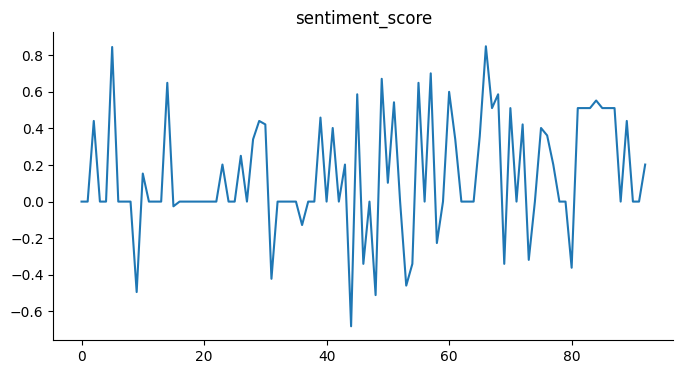

In [ ]:
from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

## **Insights from the Graph:**
### High Volatility in Sentiment



*   The sentiment score frequently jumps between positive and negative, suggesting mixed news coverage about AMD.
*   Some news articles are highly positive (near 1.0), while others are strongly negative (below -0.5).



## Sharp Spikes and Drops


*   Some sections show sudden increases or drops, which could indicate major news events, earnings reports, or market trends affecting sentiment.


## No Clear Trend


*   The sentiment does not show a clear upward or downward pattern.
*   This suggests that news sentiment alone may not be a strong predictor of AMD's stock price without additional context (e.g., technical indicators).





# Time Series Analysis of Sentiment_Score with AMD Stock Prize

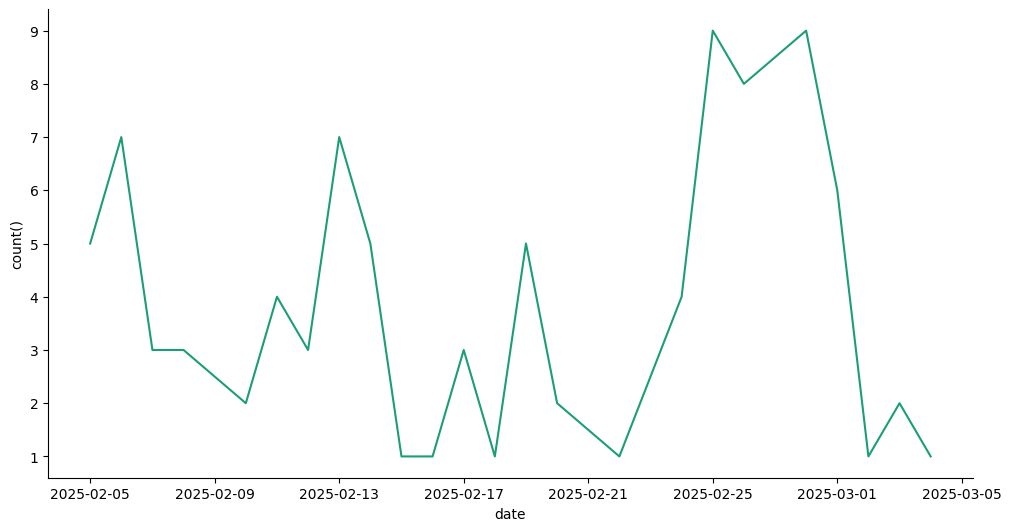

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

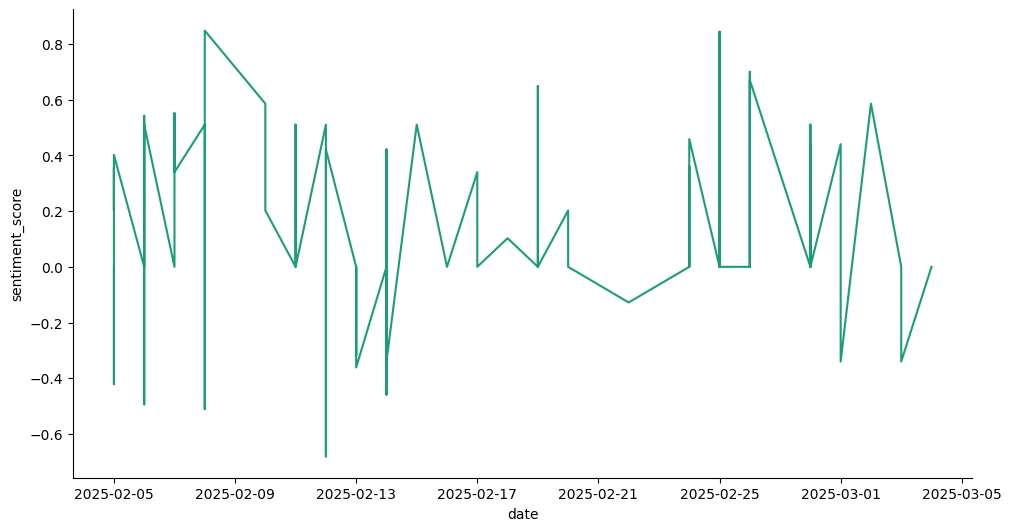

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sentiment_score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sentiment_score')

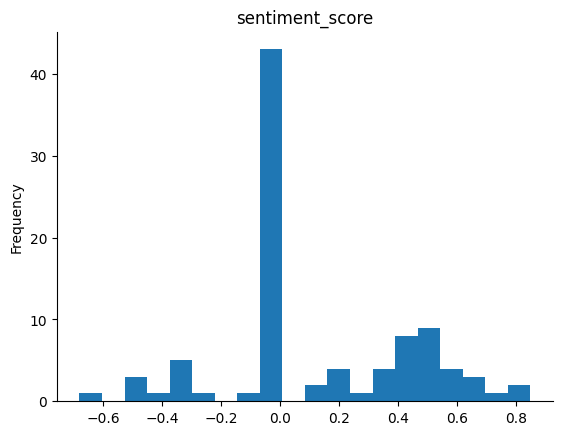

In [ ]:
from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Overall the Sentiment_Score is Normal**

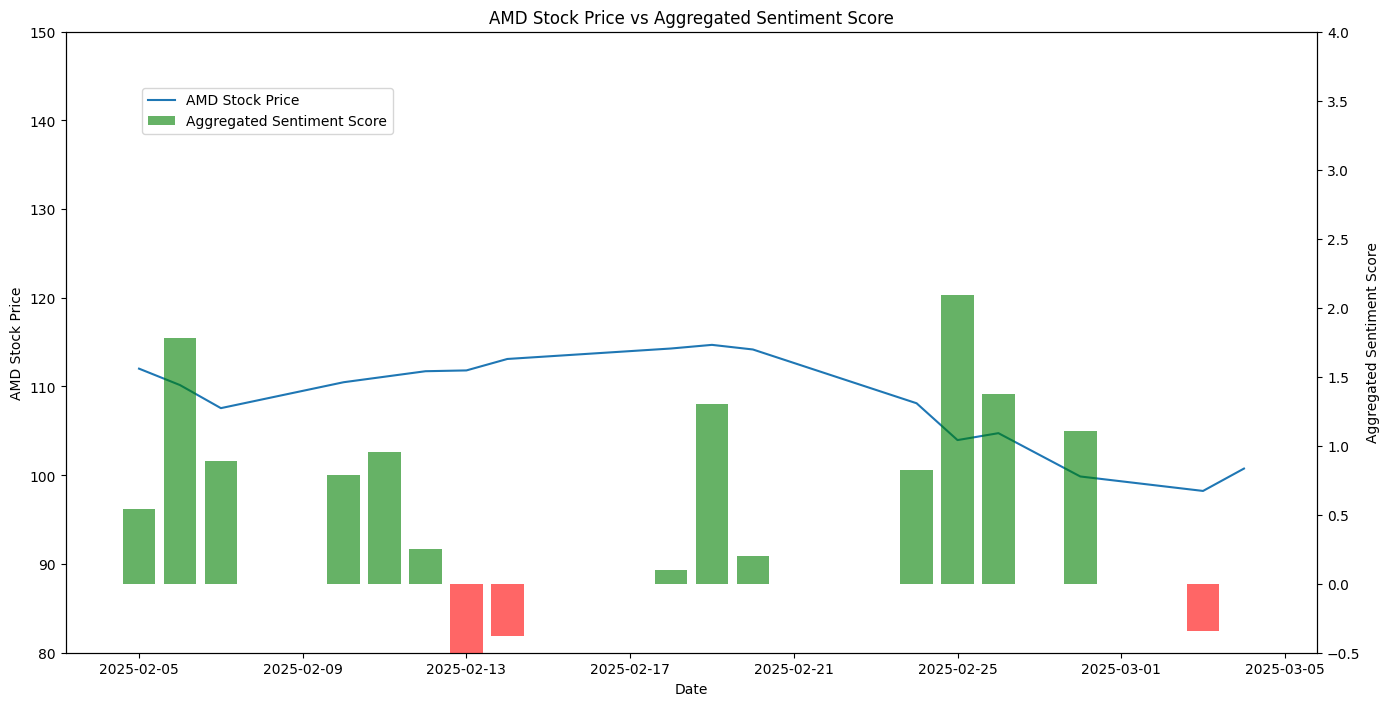

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('AMD Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='AMD Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 150)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('AMD Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

## **Obeservations**


*   On days with high positive sentiment (tall green bars), the stock price either stabilizes or trends upwards.
*   On days with negative sentiment (red bars), stock price movement is often downward or remains neutral.


*   There is some correlation between news sentiment and stock price movements, but it's not always direct.

## **Possible Outcomes**


*   Positive news coverage (green bars) may have contributed to stability or slight increases in AMD’s stock price.
*   Negative sentiment (red bars) appears on days where price movement was either downward or stagnant.
*   If sentiment data lags behind stock price movement, it may indicate that the market reacts quickly to news before sentiment is aggregated.









### **Now lets find some correlations and apply some regression techniques to further analyse**

In [ ]:
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [ ]:
combined_data


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,sentiment_score
0,2025-02-05,107.610001,112.089996,106.500000,112.010002,110385200,0.0,0.0,2025-02-05,0.5397
1,2025-02-06,110.930000,112.559998,109.019997,110.160004,50426600,0.0,0.0,2025-02-06,1.7825
2,2025-02-07,109.129997,109.919998,106.790001,107.559998,46082500,0.0,0.0,2025-02-07,0.8920
3,2025-02-10,108.440002,111.400002,108.150002,110.480003,34905400,0.0,0.0,2025-02-10,0.7882
4,2025-02-11,108.980003,113.070000,108.940002,111.099998,35033800,0.0,0.0,2025-02-11,0.9510
5,2025-02-12,109.519997,111.839996,109.059998,111.720001,25319700,0.0,0.0,2025-02-12,0.2513
6,2025-02-13,112.000000,114.599998,110.400002,111.809998,40911800,0.0,0.0,2025-02-13,-0.9315
7,2025-02-14,112.650002,114.629997,111.699997,113.099998,32477200,0.0,0.0,2025-02-14,-0.3773
8,2025-02-18,114.050003,115.550003,113.449997,114.279999,31720300,0.0,0.0,2025-02-18,0.1027
9,2025-02-19,114.250000,116.110001,113.139999,114.690002,28807700,0.0,0.0,2025-02-19,1.3005


In [ ]:
### 1. **Correlation Analysis (Sentiment vs. Stock Price)**
correlation, p_value = pearsonr(combined_data["sentiment_score"].dropna(), combined_data["Close"].dropna())
print(f"Pearson Correlation: {correlation:.3f}, P-value: {p_value:.3f}")

Pearson Correlation: -0.126, P-value: 0.630




*   Very weak negative correlation (-0.126) → Sentiment has little to no direct impact on stock price.
*   P-value (0.630) > 0.05 → Statistically insignificant, meaning the observed correlation is likely due to chance.



In [ ]:
### 2. **Regression Analysis (Sentiment Impact on Stock Price)**
X = sm.add_constant(combined_data["sentiment_score"].dropna())  # Adding a constant term
y = combined_data["Close"].dropna()

# Linear Regression Model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.2424
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.630
Time:                        14:31:25   Log-Likelihood:                -51.790
No. Observations:                  17   AIC:                             107.6
Df Residuals:                      15   BIC:                             109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             109.1465      1.680     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


## Linear Regression Analysis (Sentiment Impact on Stock Price
Performs Ordinary Least Squares (OLS) Regression, predicting stock price using sentiment score.
1.   R² = 0.016 → The model explains only 1.6% of stock price variation, which is very weak.
2.   P-value (0.630) > 0.05 → Sentiment score is not a significant predictor of stock price.
3.   Conclusion: Sentiment alone does not influence stock price movements in a meaningful way.



In [ ]:
### 3. **Lag Analysis (Sentiment Leading Stock Price)**
# Shift sentiment scores forward by 1 day to test predictive power
combined_data["lagged_sentiment"] = combined_data["sentiment_score"].shift(1)

# Drop rows where either lagged_sentiment or Close is NaN to match lengths
lagged_data = combined_data.dropna(subset=["lagged_sentiment", "Close"])

# Compute correlation only on matching data
lagged_correlation, lagged_p_value = pearsonr(lagged_data["lagged_sentiment"], lagged_data["Close"])
print(f"Lagged Pearson Correlation: {lagged_correlation:.3f}, P-value: {lagged_p_value:.3f}")

# Regression with lagged sentiment
X_lagged = sm.add_constant(combined_data["lagged_sentiment"].dropna())
model_lagged = sm.OLS(y.iloc[1:], X_lagged).fit()
print(model_lagged.summary())

Lagged Pearson Correlation: -0.348, P-value: 0.186
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.934
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.186
Time:                        14:33:40   Log-Likelihood:                -48.102
No. Observations:                  16   AIC:                             100.2
Df Residuals:                      14   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


## Lag Analysis
Shifts sentiment scores forward by 1 day (shift(1)) to check if yesterday’s sentiment impacts today’s stock price.
1.   Correlation (-0.348) is still weak, but slightly stronger than before.
2.   P-value (0.186) > 0.05 → Lagged sentiment still not statistically significant.
3.   R² = 0.121 (12.1%) → Slightly better fit, but still poor for prediction.
4.   Sentiment Score Coefficient = -2.3095 → Even if statistically significant, it suggests an inverse relationship (higher sentiment → lower stock price).



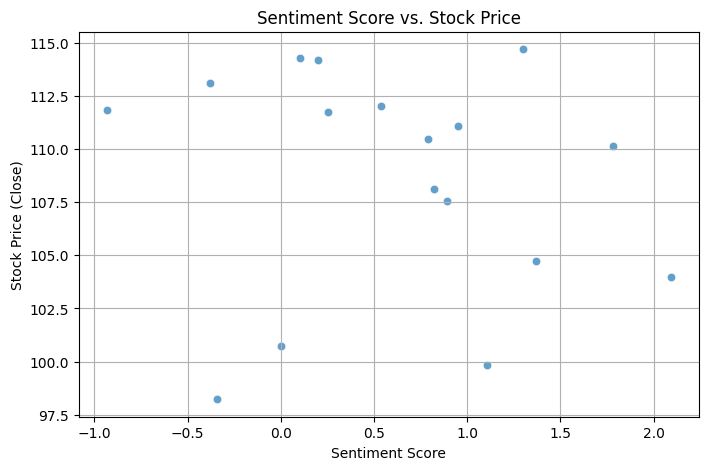

In [ ]:
### 4. **Scatter Plot: Sentiment vs. Stock Price**
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["sentiment_score"], y=combined_data["Close"], alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Stock Price (Close)")
plt.title("Sentiment Score vs. Stock Price")
plt.grid(True)
plt.show()

## Key Obeservations


*   The points are scattered without a clear trend, meaning sentiment might not have a strong direct relationship with stock price.
*   If a strong correlation existed, points would align in a clear upward (positive correlation) or downward (negative correlation) trend.




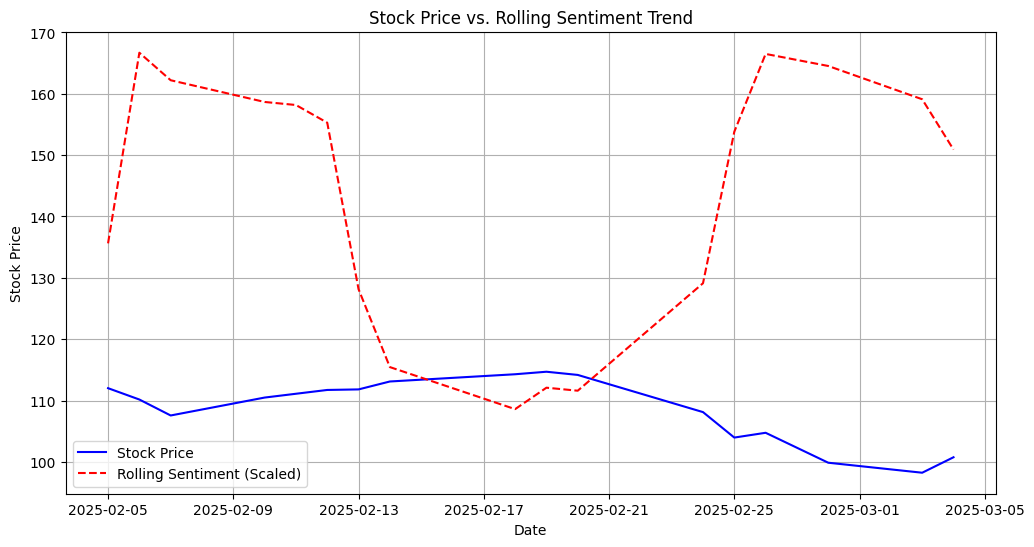

In [ ]:
### 5. **Rolling Average Sentiment vs. Stock Price Trend**
combined_data["rolling_sentiment"] = combined_data["sentiment_score"].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(combined_data["Date"], combined_data["Close"], label="Stock Price", color='blue')
plt.plot(combined_data["Date"], combined_data["rolling_sentiment"] * 50 + combined_data["Close"].mean(),
         label="Rolling Sentiment (Scaled)", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price vs. Rolling Sentiment Trend")
plt.legend()
plt.grid(True)
plt.show()

## Key Obeservations


*   There is some inverse movement at certain points, where high sentiment scores don’t always correspond to stock increases.
*   This suggests that other factors (market conditions, earnings, economic news, etc.) might have a stronger impact on stock price than sentiment alone.




## Lets run some non-linear models to further analyse

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Drop NaN values and prepare data
combined_data = combined_data.dropna(subset=["sentiment_score", "Close"])
X = combined_data[["sentiment_score"]]  # Using sentiment as the predictor
y = combined_data["Close"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
### **1. Random Forest Regressor**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
### **2. XGBoost Regressor**
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [ ]:
### **3. Support Vector Regression (SVR)**
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_preds = svr_model.predict(X_test_scaled)

In [ ]:
# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.3f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("SVR", y_test, svr_preds)


Random Forest Model Performance:
MAE: 5.055
MSE: 45.040
R² Score: -0.385

XGBoost Model Performance:
MAE: 6.225
MSE: 65.279
R² Score: -1.008

SVR Model Performance:
MAE: 4.004
MSE: 50.345
R² Score: -0.549


This results are before Grid SearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### **1. Grid Search for Random Forest**
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("\nBest Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
### **2. Grid Search for XGBoost**
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
}

xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

print("\nBest XGBoost Parameters:", xgb_grid.best_params_)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}


In [ ]:
### **3. Grid Search for SVR**
svr_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)
best_svr = svr_grid.best_estimator_

print("\nBest SVR Parameters:", svr_grid.best_params_)


Best SVR Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
### **Evaluate the Best Models**
evaluate_model("Tuned Random Forest", y_test, best_rf.predict(X_test))
evaluate_model("Tuned XGBoost", y_test, best_xgb.predict(X_test))
evaluate_model("Tuned SVR", y_test, best_svr.predict(X_test_scaled))


Tuned Random Forest Model Performance:
MAE: 4.963
MSE: 46.746
R² Score: -0.438

Tuned XGBoost Model Performance:
MAE: 4.176
MSE: 41.394
R² Score: -0.273

Tuned SVR Model Performance:
MAE: 5.872
MSE: 65.764
R² Score: -1.023


Even after applying Grid SearchCV the results are not promising.

Lets Use LSTM to further analyse

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Ensure no NaN values
combined_data = combined_data.dropna(subset=["sentiment_score", "Close"])

# Use both sentiment & previous stock price as features
X = combined_data[["sentiment_score", "Close"]].values
y = combined_data["Close"].values

In [ ]:
# Scale data for better LSTM performance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
# Convert data into time-series sequences for LSTM
def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 5  # Use last 5 days as input
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer (Stock Price Prediction)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.5605 - val_loss: 0.1932
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 0.4887 - val_loss: 0.1725
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.4280 - val_loss: 0.1554
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.3885 - val_loss: 0.1421
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3261 - val_loss: 0.1329
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3032 - val_loss: 0.1289
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.2431 - val_loss: 0.1311
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2035 - val_loss: 0.1411
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.1632 - val_loss: 0.1608
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.1233 - val_loss: 0.1925
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1035 - val_loss: 0.2364
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.0880 - val_loss: 

In [ ]:
# Make Predictions
y_pred_scaled = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


In [ ]:
# Inverse Transform Predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"MAE: {mean_absolute_error(y_test_actual, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test_actual, y_pred):.3f}")
print(f"R² Score: {r2_score(y_test_actual, y_pred):.3f}")

MAE: 6.910
MSE: 57.106
R² Score: -0.580


Even with LSTM the results are not great which finally concludes that Sentiment is not a good factor for predicting stock prize of AMD.

## **Now since sentiment is not so good indicator we would use other indicators from Stock_data and this time we would take data for whole year.**
# We would use Nvidia for this time

In [6]:
# Specify the start and end dates
start_date = "2024-03-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("NVDA")
nvidia_stock_data = nvidia_stock.history(start=start_date, end=end_date)
nvidia_stock_data.reset_index(inplace=True)
nvidia_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-03-05 00:00:00-05:00,85.249828,86.076636,83.397270,85.943665,520639000,0.004,0.0
1,2024-03-06 00:00:00-05:00,88.001183,89.702776,87.009413,88.679016,582520000,0.000,0.0
2,2024-03-07 00:00:00-05:00,90.136664,92.745048,89.580796,92.647072,608119000,0.000,0.0
3,2024-03-08 00:00:00-05:00,95.115502,97.376968,86.485540,87.507301,1142269000,0.000,0.0
4,2024-03-11 00:00:00-04:00,86.408552,88.775988,84.146087,85.753708,678364000,0.000,0.0


In [7]:
nvidia_stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-03-05 00:00:00-05:00,85.249828,86.076636,83.397270,85.943665,520639000,0.004,0.0
1,2024-03-06 00:00:00-05:00,88.001183,89.702776,87.009413,88.679016,582520000,0.000,0.0
2,2024-03-07 00:00:00-05:00,90.136664,92.745048,89.580796,92.647072,608119000,0.000,0.0
3,2024-03-08 00:00:00-05:00,95.115502,97.376968,86.485540,87.507301,1142269000,0.000,0.0
4,2024-03-11 00:00:00-04:00,86.408552,88.775988,84.146087,85.753708,678364000,0.000,0.0
...,...,...,...,...,...,...,...,...
246,2025-02-27 00:00:00-05:00,135.000000,135.009995,120.010002,120.150002,443175800,0.000,0.0
247,2025-02-28 00:00:00-05:00,118.019997,125.089996,116.400002,124.919998,389091100,0.000,0.0
248,2025-03-03 00:00:00-05:00,123.510002,123.699997,112.279999,114.059998,411381400,0.000,0.0
249,2025-03-04 00:00:00-05:00,110.650002,119.309998,110.110001,115.989998,398163300,0.000,0.0


## We would use 3 Technical Factors to predict stock prize


1.   Simple Moving Average (SMA): It calculates the average closing price over a set period (e.g., 10-day SMA, 50-day SMA).
2.   Relative Strength Index (RSI): RSI measures the momentum of a stock (whether it is overbought or oversold).
3.   Volatility (Bollinger Bands): Bollinger Bands measure stock volatility and detect breakouts.


In [8]:
### **Compute Technical Indicators (No Sentiment)**
# Short & Long Moving Averages
nvidia_stock_data["SMA_10"] = nvidia_stock_data["Close"].rolling(window=10).mean()
nvidia_stock_data["SMA_50"] = nvidia_stock_data["Close"].rolling(window=50).mean()


In [9]:
# Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

nvidia_stock_data["RSI"] = compute_rsi(nvidia_stock_data["Close"], 14)

In [10]:
# Bollinger Bands (Volatility Indicator)
nvidia_stock_data["BB_Upper"] = nvidia_stock_data["Close"].rolling(window=20).mean() + 2 * nvidia_stock_data["Close"].rolling(window=20).std()
nvidia_stock_data["BB_Lower"] = nvidia_stock_data["Close"].rolling(window=20).mean() - 2 * nvidia_stock_data["Close"].rolling(window=20).std()

In [11]:
# Drop NaN values after computing indicators
nvidia_stock_data = nvidia_stock_data.dropna()

## Preparing this new features of our data for the LSTM

In [14]:
### **3. Prepare Data for LSTM**
features = ["Close", "SMA_10", "SMA_50", "RSI", "BB_Upper", "BB_Lower"]
X = nvidia_stock_data[features].values
y = nvidia_stock_data["Close"].values

# Scale Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [15]:
# Convert to Sequences
def create_sequences(X, y, time_steps=20):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 20  # Use last 20 days as input
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

### Building the LSTM Model
Creating an LSTM-based deep learning model with the following structure:
- **Bidirectional LSTM Layers**: Captures dependencies in both forward and backward time directions.
- **Dropout Layers**: Prevents overfitting.
- **Dense Layers**: Generates final price predictions.

In [ ]:
### **4. Build Improved LSTM Model**
model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output Layer (Stock Price Prediction)
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.2150 - val_loss: 0.0811
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0598 - val_loss: 0.0263
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0450 - val_loss: 0.0266
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0326 - val_loss: 0.0204
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0262 - val_loss: 0.0202
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0260 - val_loss: 0.0196
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0255 - val_loss: 0.0166
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0250 - val_loss: 0.0320
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0268 - val_loss: 0.0194
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0275 - val_loss: 0.0152
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0221 - val_loss: 0.0155
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0189 - val

In [ ]:
# Make Predictions
y_pred_scaled = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


In [ ]:
# Inverse Transform Predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
print(f"MAE: {mean_absolute_error(y_test_actual, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test_actual, y_pred):.3f}")
print(f"R² Score: {r2_score(y_test_actual, y_pred):.3f}")

MAE: 2.762
MSE: 13.682
R² Score: 0.897


1.  MAE (Mean Absolute Error): 2.762
  → On average, the model’s predictions are only $2.76 off from the actual stock price.
2.  MSE (Mean Squared Error): 13.682
→ Lower MSE means fewer large errors, which is good!
3.  R² Score: 0.897 → 89.7% of the stock price variation is explained by the model! 🎯
*  This means the model has high predictive accuracy.

*  R² close to 1.0 is excellent in financial modeling.

## **Hyperparameter Tuning our LSTM Model to get the best Parameters using manual Tuning**

In [ ]:
# Define hyperparameter values to test
param_grid = {
    "units": [50, 100],
    "dropout_rate": [0.2, 0.3],
    "learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [50, 100]
}

# Function to create and train LSTM model
def train_lstm(units, dropout_rate, learning_rate, batch_size, epochs):
    model = Sequential([
        Bidirectional(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
        Dropout(dropout_rate),
        LSTM(units=units, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(units=units // 2, return_sequences=False),
        Dropout(dropout_rate),
        Dense(units=25),
        Dense(units=1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    # Evaluate performance
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_actual, y_pred)
    mse = mean_squared_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    return mae, mse, r2

In [ ]:
# Test different hyperparameter combinations
best_params = None
best_r2 = -np.inf  # Start with a very low R² score


In [ ]:
for units in param_grid["units"]:
    for dropout_rate in param_grid["dropout_rate"]:
        for learning_rate in param_grid["learning_rate"]:
            for batch_size in param_grid["batch_size"]:
                for epochs in param_grid["epochs"]:
                    print(f"Training with: units={units}, dropout={dropout_rate}, lr={learning_rate}, batch={batch_size}, epochs={epochs}")

                    mae, mse, r2 = train_lstm(units, dropout_rate, learning_rate, batch_size, epochs)

                    print(f"Results - MAE: {mae:.3f}, MSE: {mse:.3f}, R²: {r2:.3f}")

                    # Save best model
                    if r2 > best_r2:
                        best_r2 = r2
                        best_params = (units, dropout_rate, learning_rate, batch_size, epochs)

Training with: units=50, dropout=0.2, lr=0.001, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Results - MAE: 3.926, MSE: 24.467, R²: 0.816
Training with: units=50, dropout=0.2, lr=0.001, batch=16, epochs=100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
Results - MAE: 3.160, MSE: 15.229, R²: 0.886
Training with: units=50, dropout=0.2, lr=0.001, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Results - MAE: 3.721, MSE: 24.288, R²: 0.818
Training with: units=50, dropout=0.2, lr=0.001, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Results - MAE: 4.511, MSE: 29.007, R²: 0.782
Training with: units=50, dropout=0.2, lr=0.0005, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
Results - MAE: 3.820, MSE: 25.392, R²: 0.809
Training with: units=50, dropout=0.2, lr=0.0005, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
Results - MAE: 3.616, MSE: 20.479, R²: 0.846
Training with: units=50, dropout=0.2, lr=0.0005, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
Results - MAE: 4.304, MSE: 33.042, R²: 0.752
Training with: units=50, dropout=0.2, lr=0.0005, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
Results - MAE: 3.651, MSE: 21.113, R²: 0.842
Training with: units=50, dropout=0.3, lr=0.001, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
Results - MAE: 4.100, MSE: 26.793, R²: 0.799
Training with: units=50, dropout=0.3, lr=0.001, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 913ms/step
Results - MAE: 3.132, MSE: 14.333, R²: 0.892
Training with: units=50, dropout=0.3, lr=0.001, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Results - MAE: 4.005, MSE: 29.004, R²: 0.782
Training with: units=50, dropout=0.3, lr=0.001, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
Results - MAE: 3.249, MSE: 17.320, R²: 0.870
Training with: units=50, dropout=0.3, lr=0.0005, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
Results - MAE: 4.555, MSE: 34.352, R²: 0.742
Training with: units=50, dropout=0.3, lr=0.0005, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
Results - MAE: 3.545, MSE: 18.618, R²: 0.860
Training with: units=50, dropout=0.3, lr=0.0005, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 892ms/step
Results - MAE: 5.078, MSE: 48.698, R²: 0.635
Training with: units=50, dropout=0.3, lr=0.0005, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 966ms/step
Results - MAE: 3.453, MSE: 18.445, R²: 0.862
Training with: units=100, dropout=0.2, lr=0.001, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
Results - MAE: 3.664, MSE: 19.941, R²: 0.850
Training with: units=100, dropout=0.2, lr=0.001, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Results - MAE: 2.717, MSE: 12.481, R²: 0.906
Training with: units=100, dropout=0.2, lr=0.001, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Results - MAE: 3.502, MSE: 18.874, R²: 0.858
Training with: units=100, dropout=0.2, lr=0.001, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
Results - MAE: 3.786, MSE: 21.620, R²: 0.838
Training with: units=100, dropout=0.2, lr=0.0005, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
Results - MAE: 4.479, MSE: 30.008, R²: 0.775
Training with: units=100, dropout=0.2, lr=0.0005, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Results - MAE: 3.176, MSE: 16.759, R²: 0.874
Training with: units=100, dropout=0.2, lr=0.0005, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
Results - MAE: 4.153, MSE: 29.635, R²: 0.778
Training with: units=100, dropout=0.2, lr=0.0005, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
Results - MAE: 3.670, MSE: 21.839, R²: 0.836
Training with: units=100, dropout=0.3, lr=0.001, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 959ms/step
Results - MAE: 4.955, MSE: 36.941, R²: 0.723
Training with: units=100, dropout=0.3, lr=0.001, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
Results - MAE: 4.892, MSE: 34.275, R²: 0.743
Training with: units=100, dropout=0.3, lr=0.001, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
Results - MAE: 4.042, MSE: 23.341, R²: 0.825
Training with: units=100, dropout=0.3, lr=0.001, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
Results - MAE: 3.491, MSE: 17.882, R²: 0.866
Training with: units=100, dropout=0.3, lr=0.0005, batch=16, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step
Results - MAE: 3.683, MSE: 22.292, R²: 0.833
Training with: units=100, dropout=0.3, lr=0.0005, batch=16, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Results - MAE: 4.833, MSE: 34.902, R²: 0.738
Training with: units=100, dropout=0.3, lr=0.0005, batch=32, epochs=50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step
Results - MAE: 4.224, MSE: 29.546, R²: 0.778
Training with: units=100, dropout=0.3, lr=0.0005, batch=32, epochs=100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
Results - MAE: 3.518, MSE: 17.396, R²: 0.869


In [ ]:
print("\nBest Hyperparameters:", best_params)
print("Best R² Score:", best_r2)



Best Hyperparameters: (100, 0.2, 0.001, 16, 100)
Best R² Score: 0.9063567409647166


In [ ]:
# Train the final optimized model
best_model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),  # 100/2 = 50
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
best_model.compile(optimizer=optimizer, loss="mean_squared_error")

# Train model with best hyperparameters
best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Make Predictions
y_pred_scaled = best_model.predict(X_test)

# Inverse Transform Predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate Final Model
print(f"Final MAE: {mean_absolute_error(y_test_actual, y_pred):.3f}")
print(f"Final MSE: {mean_squared_error(y_test_actual, y_pred):.3f}")
print(f"Final R² Score: {r2_score(y_test_actual, y_pred):.3f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - loss: 0.1522 - val_loss: 0.0433
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0346 - val_loss: 0.0202
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0304 - val_loss: 0.0241
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0290 - val_loss: 0.0211
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0230 - val_loss: 0.0190
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0277 - val_loss: 0.0177
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0218 - val_loss: 0.0157
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0303 - val_loss: 0.0148
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0331 - val_loss: 0.0145
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0221 - val_loss: 0.0176
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0235 - val_loss: 0.0140
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0215 - val_loss: 0.014

1.  MAE (Mean Absolute Error): 2.974
→ On average, the model is $2.97 off from the actual stock price.
2.  MSE (Mean Squared Error): 15.162
→ Slight increase from previous 13.682, but still low.
3.  R² Score: 0.886
→ Slight drop from 0.897, but still very strong predictive power.

# Conclusion
In Final we can take few Takeaways from our analysis


*   Sentiment is not driving the Stock Prize of AMD
*   A bidirectional LSTM Model is performing really good to predict the stock prize of Nvidia.

# Future Works
1. Try More Features
    *   MACD (Moving Average Convergence Divergence).
    *   Trading Volume.
    *   NASDAQ/S&P 500 Index Trends.
2.  Increase Time Steps
    *   Trying 30 or 50 days instead of 20 days.
    *   More past data might improve accuracy.
3.  Experiment with Model Architectures
    *   Adding another Layer of LSTM  or increase LSTM units.
    *   Trying GRU (Gated Recurrent Unit) instead of LSTM.





